In [51]:
pip install rpy2


  Obtaining dependency information for rpy2 from https://files.pythonhosted.org/packages/e1/09/fe9825a32d0e5331b2bb6e211d140e19e266ccdbe7c4842bbb080c23d05e/rpy2-3.5.14-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for tzlocal from https://files.pythonhosted.org/packages/97/3f/c4c51c55ff8487f2e6d0e618dba917e3c3ee2caae6cf0fbb59c9b1876f2e/tzlocal-5.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.9/299.9 kB 3.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri

In [2]:
df_1 = pd.read_csv("finalmerge.csv")

In [10]:
# Check to see how many unique brand values there are 
unique_brands_sorted = sorted(df_1['BRAND'].unique())
print(unique_brands_sorted)


['         ', "'FI/ROBE ", '1', '1017113', '1258700A ', '1720P3A  ', '1928 JEW ', '2 BLUE', '2 HIP /  ', '212 /PUI ', '212 FAHR ', '222 FIFT ', '3622251', '4412768', '6 DEGREE ', '8241 RAN ', '9 WEST   ', '@ SEA (A ', 'A        ', 'A B S CL ', 'A H SCHR ', 'A. BROD  ', 'A. DEE O ', 'A.C.T. I ', 'A.R.KNIT ', 'A.V.DENI ', 'A4560    ', 'A6720RY  ', 'ABG FOR  ', 'ACCESSOR ', 'ADG/DESI ', 'ADIA KIB ', 'ADIDAS A ', 'ADRIANNA ', 'AGB      ', 'AHA', 'AHEAD HE ', 'AIRWAIR  ', 'AIRWAY/A ', 'AJI DBA  ', 'AJI/DBA  ', 'ALBERTO  ', 'ALEX     ', 'ALEXANDE ', 'ALEXX', 'ALI-KHAN ', 'ALL ABOU ', 'ALL ACCE ', 'ALL PRO  ', 'ALLSTATE ', "ALM INT' ", 'ALPHA GA ', 'ALPHA MI ', 'AMASIA I ', 'AMBIANCE ', 'AMER ANG ', 'AMERIBAG ', 'AMERICAN ', 'AMINCO I ', 'ANCIENT  ', 'AND 1 KI ', 'ANDREW S ', 'ANGEL IN ', 'ANGELS S ', 'ANIPALS  ', 'ANN TRAV ', 'ANNE KLE ', 'ANONAME  ', 'ANTIGUA  ', 'ANTIQUIT ', 'ANUCCI   ', 'ANYWHERE ', 'APPAREL  ', 'ARAMIS   ', 'ARBOR HI ', 'ARIZONA  ', 'ARLEEN C ', 'AROMA BO ', 'ARTHUR C ',

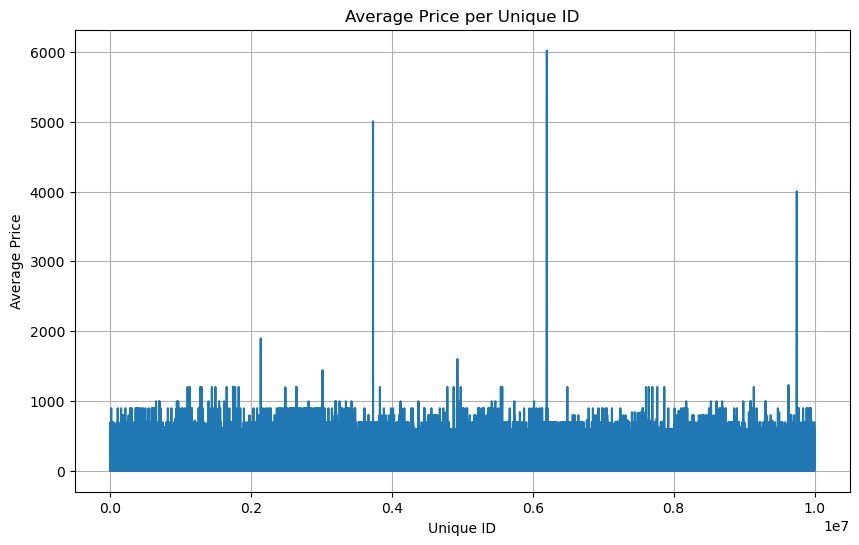

In [18]:
# Find basic statistics for Orgprice so you can determine the price ranges for your brand dummy 
# Group by 'unique_id' and calculate the mean price for each group
grouped_data = df_1.groupby('SKU')['ORGPRICE'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['SKU'], grouped_data['ORGPRICE'], linestyle='-')
plt.title('Average Price per Unique ID')
plt.xlabel('Unique ID')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [20]:
df_1['ORGPRICE'].describe()

count    6.582530e+07
mean     3.906951e+01
std      5.450268e+01
min      0.000000e+00
25%      1.750000e+01
50%      2.900000e+01
75%      4.900000e+01
max      6.017000e+03
Name: ORGPRICE, dtype: float64

In [23]:
# Calculate quartile values for 'price'
q25 = df_1['ORGPRICE'].quantile(0.25)
q75 = df_1['ORGPRICE'].quantile(0.75)


In [29]:
# Create a new column 'price_category' based on quartiles
df_1['BRAND_dummy'] = pd.cut(df_1['ORGPRICE'],
                              bins=[-float('inf'), q25, q75, float('inf')],
                              labels=['Cheap', 'Affordable', 'Luxury'])

In [30]:
# Create dummy variables for 'price_category'
dummy_df = pd.get_dummies(df_1['BRAND_dummy'], prefix='BRAND_dummy')

# Concatenate the dummy variables with the original DataFrame
df_1 = pd.concat([df_1, dummy_df], axis=1)

In [31]:
df_1.head()

,Unnamed: 0,SKU,STYPE,STORE,ORGPRICE,QUANTITY,SALEDATE,AMT,BRAND,DEPT,RETAIL,CITY,STATE,COUNTY,BRAND_dummy,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury
0,0,3,P,202,30.0,1,2005-01-18,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0
1,1,3,R,202,30.0,1,2005-01-29,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0
2,2,450,P,202,6.0,1,2005-07-10,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0
3,3,450,P,202,6.0,1,2005-06-06,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0
4,4,450,P,202,6.0,1,2005-07-29,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0


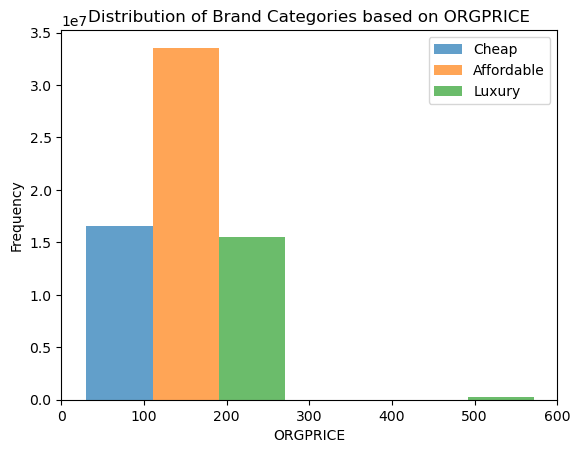

In [35]:
# Plot histogram
plt.hist([df_1[df_1['BRAND_dummy_Cheap'] == 1]['ORGPRICE'],
          df_1[df_1['BRAND_dummy_Affordable'] == 1]['ORGPRICE'],
          df_1[df_1['BRAND_dummy_Luxury'] == 1]['ORGPRICE']],
         bins=20, alpha=0.7, label=['Cheap', 'Affordable', 'Luxury'])

plt.xlabel('ORGPRICE')  # Change xlabel to ORGPRICE
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Brand Categories based on ORGPRICE')  # Change title to ORGPRICE
plt.xlim(0, 600)
plt.show()

In [36]:
# Identify observations with prices above 450$
high_price_obs = df_1[df_1['ORGPRICE'] >= 450]

# Print the DataFrame with high prices
print("Observations with Prices Above 450$")
print(high_price_obs)

Observations with Prices Above 450$
          Unnamed: 0      SKU STYPE  STORE  ORGPRICE  QUANTITY    SALEDATE  \
2564            2564   129814     R    202     595.0         1  2005-03-14   
2565            2565   129814     P    202     595.0         1  2005-02-23   
2566            2566   129814     P    202     595.0         1  2005-06-06   
2857            2857   149814     P    202     595.0         1  2005-04-15   
3551            3551   183444     P    202     625.0         1  2005-08-13   
...              ...      ...   ...    ...       ...       ...         ...   
65821853    65821853  9747774     P   1609    4004.0         1  2005-08-15   
65821854    65821854  9747774     P   1609    4004.0         1  2005-08-15   
65821855    65821855  9747774     P   1609    4004.0         1  2005-05-29   
65821856    65821856  9747774     P   1609    4004.0         1  2005-03-29   
65821857    65821857  9747774     P   1609    4004.0         1  2005-03-29   

            AMT      BRAND 

### We discovered a few outliears so we decided to drop all products that have a price greater than 1000

In [37]:
# Remove rows with ORGPRICE > 1000
df_1 = df_1[df_1['ORGPRICE'] <= 1000].reset_index(drop=True)

In [43]:
# Check for duplicate rows based on all columns
duplicate_rows = df_1[df_1.duplicated()]
duplicate_rows

,Unnamed: 0,SKU,STYPE,STORE,ORGPRICE,QUANTITY,SALEDATE,AMT,BRAND,DEPT,RETAIL,CITY,STATE,COUNTY,BRAND_dummy,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury


In [40]:
# Check for any duplicate rows
has_duplicates = df_1.duplicated().any()

In [44]:
# We observe no duplicate rows
has_duplicates

False

In [45]:
# Create dummy variable for 'style' where 1 corresponds to 'R' and 0 otherwise
df_1['Returns'] = df_1['STYPE'].apply(lambda x: 1 if x == 'R' else 0)

In [46]:
df_1.head()

,Unnamed: 0,SKU,STYPE,STORE,ORGPRICE,QUANTITY,SALEDATE,AMT,BRAND,DEPT,RETAIL,CITY,STATE,COUNTY,BRAND_dummy,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury,Returns
0,0,3,P,202,30.0,1,2005-01-18,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0,0
1,1,3,R,202,30.0,1,2005-01-29,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0,1
2,2,450,P,202,6.0,1,2005-07-10,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0,0
3,3,450,P,202,6.0,1,2005-06-06,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0,0
4,4,450,P,202,6.0,1,2005-07-29,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0,0


### Data Modeling 

In [54]:
from statsmodels.formula.api import ols

In [57]:
df_1.corr()

/var/folders/48/hmcrzlgx0pd5b5ct_wm842_00000gn/T/ipykernel_38100/2471619009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()


,Unnamed: 0,SKU,STORE,ORGPRICE,QUANTITY,AMT,DEPT,RETAIL,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury,Returns
Unnamed: 0,1.000000,0.005990,0.189262,-0.019321,0.000219,-0.017723,0.004847,-0.023189,0.011584,0.013396,-0.027467,-0.001847
SKU,0.005990,1.000000,0.002131,0.011716,-0.000029,0.009633,0.021028,-0.002120,-0.003868,-0.007779,0.013045,0.002237
STORE,0.189262,0.002131,1.000000,-0.000251,0.000092,-0.000673,0.003397,-0.003654,0.001716,0.000450,-0.002272,0.003495
ORGPRICE,-0.019321,0.011716,-0.000251,1.000000,0.000089,0.916853,0.177891,0.754642,-0.379142,-0.213072,0.634921,0.062054
QUANTITY,0.000219,-0.000029,0.000092,0.000089,1.000000,0.000113,-0.000018,-0.000028,-0.000134,0.000062,0.000064,0.000813
AMT,-0.017723,0.009633,-0.000673,0.916853,0.000113,1.000000,0.220648,0.801399,-0.349383,-0.174119,0.559042,0.071714
DEPT,0.004847,0.021028,0.003397,0.177891,-0.000018,0.220648,1.000000,0.091568,-0.217812,0.016948,0.201476,0.064074
RETAIL,-0.023189,-0.002120,-0.003654,0.754642,-0.000028,0.801399,0.091568,1.000000,-0.264658,-0.119101,0.408484,0.040938
BRAND_dummy_Cheap,0.011584,-0.003868,0.001716,-0.379142,-0.000134,-0.349383,-0.217812,-0.264658,1.000000,-0.590202,-0.324647,-0.068815
BRAND_dummy_Affordable,0.013396,-0.007779,0.000450,-0.213072,0.000062,-0.174119,0.016948,-0.119101,-0.590202,1.000000,-0.571923,0.011131


In [66]:
features = ['Returns', 
            'ORGPRICE',
            'BRAND_dummy_Cheap',
            'BRAND_dummy_Affordable',
            'BRAND_dummy_Luxury', 
            'QUANTITY', 
            'DEPT',
            'RETAIL']

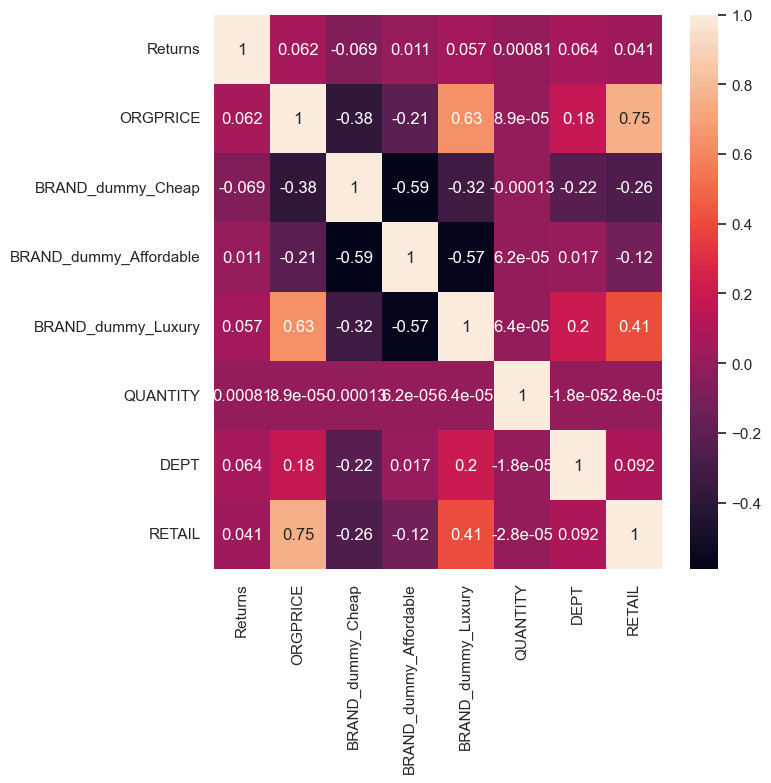

In [65]:
heat_map = sns.set(style = "darkgrid") 

f,ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_1[features].corr(), cmap=heat_map, annot=True)

f.tight_layout()

In [74]:
df_1.shape

(65820533, 19)